<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
ad_data=pd.read_csv('advertising.csv')

In [4]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [5]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


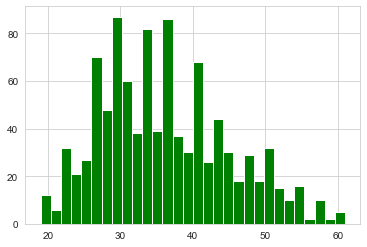

<Figure size 720x720 with 0 Axes>

In [17]:
plt.hist(ad_data['Age'],bins=30,density=False,color='Green',label='Age')
plt.figure(figsize=(10,10))
sns.set_style('whitegrid')


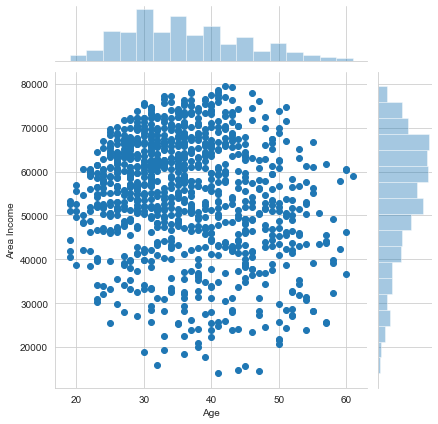

In [20]:
sns.jointplot(x='Age',y='Area Income',data=ad_data,kind='scatter')

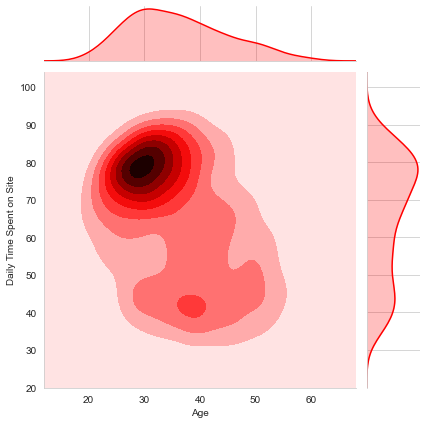

In [25]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=ad_data,kind='kde',color='red')

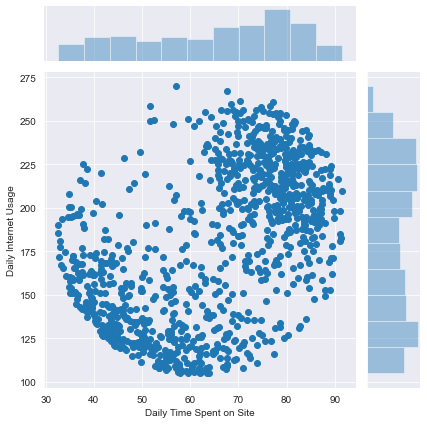

<Figure size 576x1080 with 0 Axes>

In [34]:
sns.jointplot(data=ad_data,x='Daily Time Spent on Site',y='Daily Internet Usage')
plt.figure(figsize=(8,15))
sns.set_style('darkgrid')

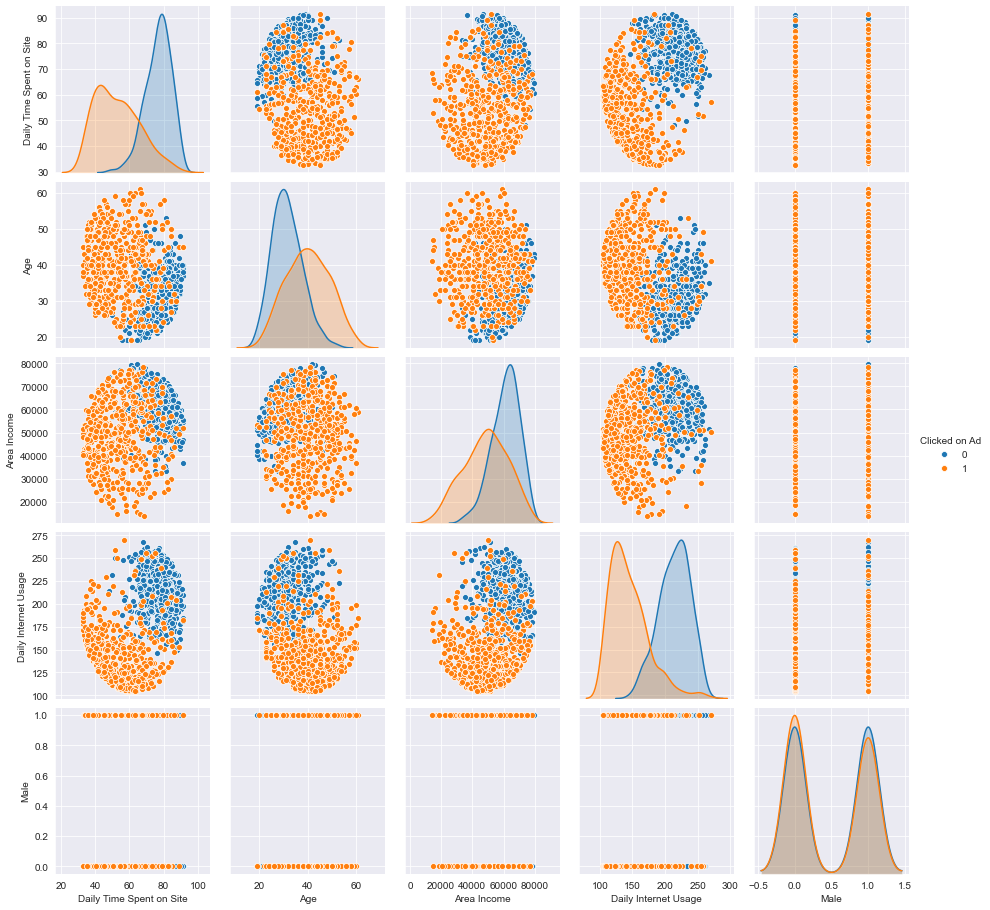

In [38]:
sns.pairplot(data=ad_data,hue='Clicked on Ad')

In [39]:
ad_data.drop(['Ad Topic Line','City','Country','Timestamp'],axis=1,inplace=True)

In [40]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train,X_test,y_train,y_test=train_test_split(ad_data.drop('Clicked on Ad',axis=1),ad_data['Clicked on Ad'],test_size=0.3,random_state=101)

In [43]:
X_train

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
290,50.52,31,72270.88,171.62,0
167,86.06,31,53767.12,219.72,1
486,83.97,40,66291.67,158.42,1
683,76.83,28,67990.84,192.81,0
876,67.39,44,51257.26,107.19,0
...,...,...,...,...,...
575,48.86,54,53188.69,134.46,0
838,44.13,40,33601.84,128.48,1
337,75.32,28,59998.50,233.60,1
523,67.94,43,68447.17,128.16,0


In [44]:
X_test

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
545,42.60,55,55121.65,168.29,0
298,80.39,31,66269.49,214.74,0
109,74.02,32,72272.90,210.54,0
837,55.77,49,55942.04,117.33,1
194,77.20,33,49325.48,254.05,1
...,...,...,...,...,...
847,88.82,36,58638.75,169.10,0
682,43.57,36,50971.73,125.20,1
884,70.92,39,66522.79,249.81,1
325,36.87,36,29398.61,195.91,0


In [45]:
y_train

290    1
167    0
486    0
683    0
876    1
      ..
575    1
838    1
337    0
523    1
863    0
Name: Clicked on Ad, Length: 700, dtype: int64

In [46]:
y_test

545    1
298    0
109    0
837    1
194    0
      ..
847    0
682    1
884    0
325    1
482    0
Name: Clicked on Ad, Length: 300, dtype: int64

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [53]:
prediction=lr.predict(X_test)

In [54]:
from sklearn.metrics import classification_report

In [55]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



### Accuracy = TP+TN/TP+FP+FN+TN
### Precision = TP/TP+FP
### Recall = TP/TP+FN
F1 score - F1 Score is the weighted average of Precision and Recall.
### F1 Score = 2*(Recall * Precision) / (Recall + Precision)